# 1. Describing the Business Problem.

Your company now sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of your company's new movie studio can use to help decide what type of films to create.


# 2. Describing the Available Data.

In the folder `zippedData` are movie datasets from:

* [Box Office Mojo](https://www.boxofficemojo.com/)
* [IMDB](https://www.imdb.com/)
* [Rotten Tomatoes](https://www.rottentomatoes.com/)
* [TheMovieDB](https://www.themoviedb.org/)
* [The Numbers](https://www.the-numbers.com/)

In addition, I included the following datasets from Kaggle in `.extraData`:

* [Oscar Awards](https://www.kaggle.com/datasets/unanimad/the-oscar-award)
* [Golden Globe Awards](https://www.kaggle.com/datasets/unanimad/golden-globe-awards)
* [The Movies Dataset](https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset?select=movies_metadata.csv)


# 3. Proposed Analysis Steps

1. Outline general analysis approach.
2. Load all available data from multiple sources into pandas dataframes. Review data frames using "describe()" method.
3. Identify dataframes and columns we'll use for the analysis. Review the proposed analysis approach in context of the data availability. For each dataframe perform cleaning for the variables of interest.
4. Create a combined dataframe containing relevant variables. 
5. Perform EDA.
6. Draw conclusions and present our recomendation.

## 3. 1. General Analysis Approach.

I'll start with 'overwhelmed and crunched for time' analysis.
I'm going to load up the dataframes and review the contents. After reviewing the contents, I'm going to slice and clean up relevant dataframes. I'm going to create a dataframe containg the following columns (attributes): Year, Movie Title, Movie Review Rating, Movie Screen Rating, Genre, Budget, Box Office Gross.

We'll perform exploratory analysis on to see how total movie profits vary by genres if they correlate with ratings.

## 3.2. Data Loading.

We'll load up dataframes and extract info from the `.zippedData` directory.

In [448]:
import pandas as pd
import numpy as np
# linear regression libs

# sql libs
from pandasql import sqldf
import sqlite3 

# plotting libs
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# loading databases
import os

# Directory path
directory = './zippedData'

# List directory contents
files = [f for f in os.listdir(directory) if not f.startswith('.')]
# Print the contents
print(files)

# function to load csv ant tsv data files

def load_df_(filepath, mysep):
# Try reading the file with different encodings or detect the encoding automatically
    try:
        # Try reading with UTF-8 encoding
        df = pd.read_csv(filepath, encoding='utf-8', sep=mysep)
    except UnicodeDecodeError:
        try:
            # Try reading with Latin-1 encoding
            df = pd.read_csv(filepath, encoding='latin-1', sep=mysep)
        except UnicodeDecodeError:
            # Try reading with automatic encoding detection
                df = pd.read_csv(filepath, encoding='auto', sep=mysep)
    return df

['unzipped', 'tmdb.movies.csv.gz', 'im.db.zip', 'rt.reviews.tsv.gz', 'rt.movie_info.tsv.gz', 'tn.movie_budgets.csv.gz', 'bom.movie_gross.csv.gz']


In [449]:
# load csv and tsv files into dataframes: tmdb
tmdb_df = pd.read_csv(os.path.join(directory, contents[1]))
tmdb_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [450]:
tmdb_df.describe(include='all')

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
count,26517.00000,26517,26517.000000,26517,26517,26517.000000,26517,26517,26517.000000,26517.000000
unique,NaN,2477,NaN,76,24835,NaN,3433,24688,NaN,NaN
top,NaN,[99],NaN,en,Eden,NaN,2010-01-01,Eden,NaN,NaN
freq,NaN,3700,NaN,23291,7,NaN,269,7,NaN,NaN
mean,13258.00000,NaN,295050.153260,NaN,NaN,3.130912,NaN,NaN,5.991281,194.224837
std,7654.94288,NaN,153661.615648,NaN,NaN,4.355229,NaN,NaN,1.852946,960.961095
min,0.00000,NaN,27.000000,NaN,NaN,0.600000,NaN,NaN,0.000000,1.000000
25%,6629.00000,NaN,157851.000000,NaN,NaN,0.600000,NaN,NaN,5.000000,2.000000
50%,13258.00000,NaN,309581.000000,NaN,NaN,1.374000,NaN,NaN,6.000000,5.000000
75%,19887.00000,NaN,419542.000000,NaN,NaN,3.694000,NaN,NaN,7.000000,28.000000


In [451]:
# rotten tomatoes reviews and info
rt_reviews_df = pd.read_csv(os.path.join(directory, contents[4]), encoding='latin-1', sep='\t')
rt_reviews_df.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [452]:
rt_reviews_df.describe(include='all')

,id,review,rating,fresh,critic,top_critic,publisher,date
count,54432.000000,48869,40915,54432,51710,54432.000000,54123,54432
unique,NaN,48682,186,2,3496,NaN,1281,5963
top,NaN,Parental Content Review,3/5,fresh,Emanuel Levy,NaN,eFilmCritic.com,"January 1, 2000"
freq,NaN,24,4327,33035,595,NaN,673,4303
mean,1045.706882,NaN,NaN,NaN,NaN,0.240594,NaN,NaN
std,586.657046,NaN,NaN,NaN,NaN,0.427448,NaN,NaN
min,3.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,542.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
50%,1083.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
75%,1541.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN


In [453]:
# rotten tomatoes reviews and info
rt_movie_info_df = pd.read_csv(os.path.join(directory, contents[5]), sep='\t')
rt_movie_info_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [454]:
rt_movie_info_df.describe(include = 'all')

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
count,1560.000000,1498,1557,1552,1361,1111,1201,1201,340,340,1530,494
unique,NaN,1497,6,299,1125,1069,1025,717,1,336,142,200
top,NaN,A group of air crash survivors are stranded in...,R,Drama,Steven Spielberg,Woody Allen,"Jan 1, 1987","Jun 1, 2004",$,"20,900,803",90 minutes,Universal Pictures
freq,NaN,2,521,151,10,4,8,11,340,2,72,35
mean,1007.303846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,579.164527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,504.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1007.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1503.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [455]:
# movie budgets
movie_budgets_df = pd.read_csv(os.path.join(directory, contents[6]))
movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [456]:
movie_budgets_df.describe(include = 'all')

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
count,5782.000000,5782,5782,5782,5782,5782
unique,NaN,2418,5698,509,5164,5356
top,NaN,"Dec 31, 2014",Halloween,"$20,000,000",$0,$0
freq,NaN,24,3,231,548,367
mean,50.372363,NaN,NaN,NaN,NaN,NaN
std,28.821076,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN
25%,25.000000,NaN,NaN,NaN,NaN,NaN
50%,50.000000,NaN,NaN,NaN,NaN,NaN
75%,75.000000,NaN,NaN,NaN,NaN,NaN


In [457]:
# movie box office
movie_box_df = pd.read_csv(os.path.join(directory, contents[7]))
movie_box_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [458]:
movie_box_df.describe(include='all')

,title,studio,domestic_gross,foreign_gross,year
count,3387,3382,3.359000e+03,2037,3387.000000
unique,3386,257,NaN,1204,NaN
top,Bluebeard,IFC,NaN,1200000,NaN
freq,2,166,NaN,23,NaN
mean,NaN,NaN,2.874585e+07,NaN,2013.958075
std,NaN,NaN,6.698250e+07,NaN,2.478141
min,NaN,NaN,1.000000e+02,NaN,2010.000000
25%,NaN,NaN,1.200000e+05,NaN,2012.000000
50%,NaN,NaN,1.400000e+06,NaN,2014.000000
75%,NaN,NaN,2.790000e+07,NaN,2016.000000


In [459]:
# For the sql database and oscars, unzip into the directory
import zipfile

# Path to the zipped files
zip_file_path = os.path.join(directory)

# Directory to extract the contents
extract_to_directory = os.path.join(directory, 'unzipped')
os.makedirs(extract_to_directory, exist_ok=True)
contents_of_zip_dir = os.listdir(extract_to_directory)

# if already unzipped, skip
files = [f for f in os.listdir(directory) if f.endswith('.zip')]

# unzip all files
for f in files:
    # name before zip
    base_name, extension = os.path.splitext(f)
    if (base_name not in contents_of_zip_dir):
        # Open the zip file
        with zipfile.ZipFile(os.path.join(zip_file_path, f), 'r') as zip_ref:
            # Extract all contents to the specified directory
            zip_ref.extractall(extract_to_directory)

        print("zipped data ", f, " extracted successfully into", contents_of_zip_dir)

In [460]:
#path to imdb database
imdb_file = os.path.join(extract_to_directory, 'im.db')

### 3.2.1. IMDB Database Structure

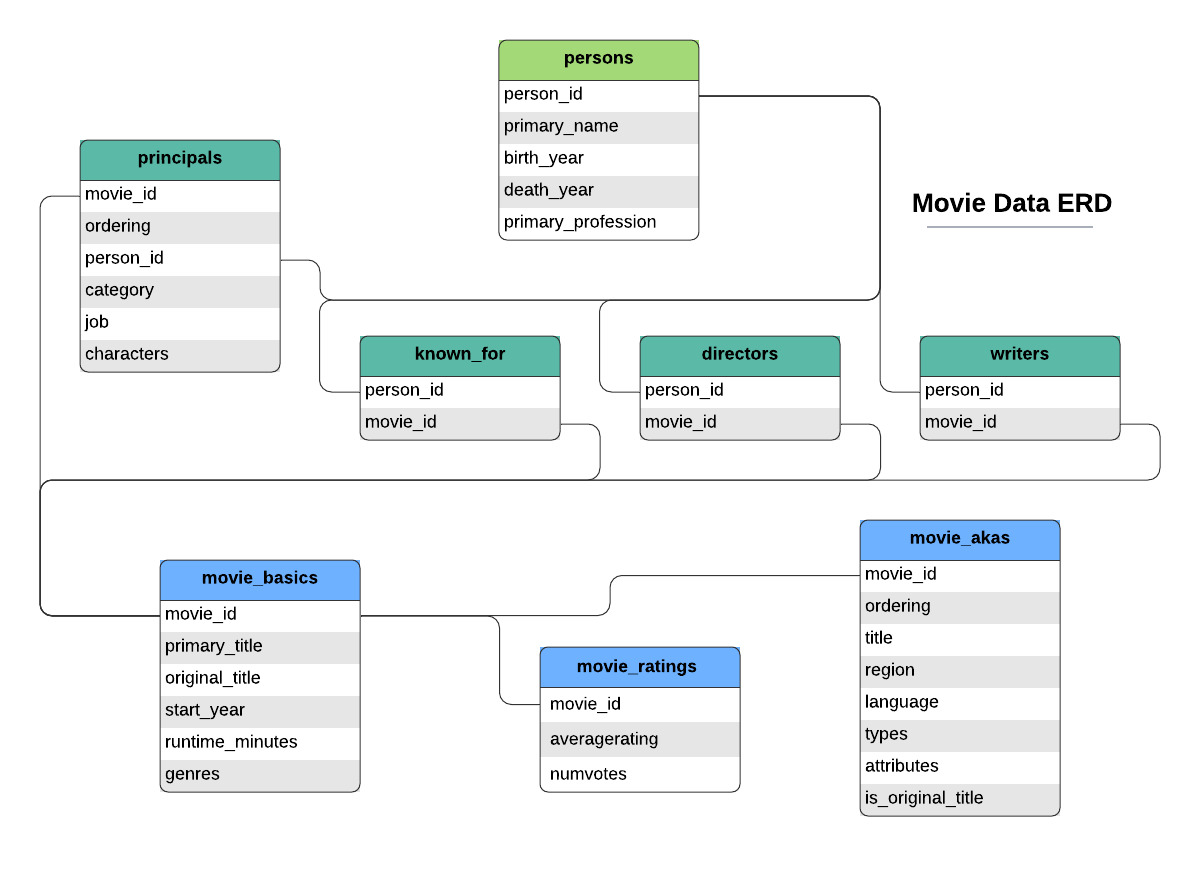

In [461]:
# use sqlite to extract info from movie_basics, 
conn = sqlite3.connect(imdb_file)
cur = conn.cursor()

movie_basics = pd.DataFrame(
    data=cur.execute("""SELECT * FROM movie_basics;""").fetchall(),
    columns=[x[0] for x in cur.description]
)
print(movie_basics.shape)
movie_basics.head()

(146144, 6)


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [462]:
movie_basics.describe(include='all')

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
count,146144,146144,146123,146144.000000,114405.000000,140736
unique,146144,136071,137773,NaN,NaN,1085
top,tt3814678,Home,Broken,NaN,NaN,Documentary
freq,1,24,19,NaN,NaN,32185
mean,NaN,NaN,NaN,2014.621798,86.187247,NaN
std,NaN,NaN,NaN,2.733583,166.360590,NaN
min,NaN,NaN,NaN,2010.000000,1.000000,NaN
25%,NaN,NaN,NaN,2012.000000,70.000000,NaN
50%,NaN,NaN,NaN,2015.000000,87.000000,NaN
75%,NaN,NaN,NaN,2017.000000,99.000000,NaN


In [463]:
movie_ratings = pd.DataFrame(
    data=cur.execute("""SELECT * FROM movie_ratings;""").fetchall(),
    columns=[x[0] for x in cur.description]
)
movie_ratings.head()
conn.close()

In [464]:
movie_ratings.describe(include = 'all')

,movie_id,averagerating,numvotes
count,73856,73856.000000,7.385600e+04
unique,73856,NaN,NaN
top,tt2124832,NaN,NaN
freq,1,NaN,NaN
mean,NaN,6.332729,3.523662e+03
std,NaN,1.474978,3.029402e+04
min,NaN,1.000000,5.000000e+00
25%,NaN,5.500000,1.400000e+01
50%,NaN,6.500000,4.900000e+01
75%,NaN,7.400000,2.820000e+02


## 3.3. Review of DataFrames.

Let's review our movie data objective: for each movie titl we would like to have a budget, a box office, and a review score. We can easily add review scores joining the two IMDB tables on `movie_id`.

We have two dataframes that contain movie profits but only one contains the budget.  

* We won't be using the Rotten Tomatoes review for now as it is missing the movie titles.
* We won't be using the Movie DB because it is likely to contain the similar to IMDB information.
* We won't be using the Box Office dataframe because it is missing the production budget.

### 3.3.1. Merging IMDB Dataframes.
Next, we'll join imdb's movie basics dataframe with movie reviews, and perform initial cleaning: find and remove duplicates, remove NaNs, include most relevant movies.

In [481]:
# merge imdb dataframes
imdb_movies_rated = pd.merge(movie_basics, movie_ratings, on='movie_id', how='inner')
imdb_movies_rated.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


### 3.3.2. Removing Duplicates From IMDB Dataframe. 

In [482]:
# Sort the number of votes in descending order
imdb_sorted_by_ratings = imdb_movies_rated.sort_values(by='numvotes', ascending=False)

# Drop duplicates in columns 'primary_title' and 'start_year', keeping the first occurrence (largest number of votes)
imdb_unique = imdb_sorted_by_ratings.drop_duplicates(subset=['primary_title', 'start_year'], keep='first')

#filter y2k 
imdb_unique = imdb_unique[imdb_unique['start_year']>=2000]

#distribution of votes and runtime
print(imdb_unique['numvotes'].quantile([0.25, 0.5, 0.85]))
print(imdb_unique['runtime_minutes'].quantile([0.25, 0.5, 0.75]))
imdb_unique['runtime_minutes'].describe()

0.25     14.0
0.50     49.0
0.85    775.0
Name: numvotes, dtype: float64
0.25     81.0
0.50     91.0
0.75    104.0
Name: runtime_minutes, dtype: float64


count    65723.000000
mean        94.688070
std        209.377979
min          3.000000
25%         81.000000
50%         91.000000
75%        104.000000
max      51420.000000
Name: runtime_minutes, dtype: float64

In [467]:
# max runtime value is 51420.000000, we need to cap movie duration at a reasonable length (say 4 hours)
max_runtime_min = 240;
imdb_unique = imdb_unique[imdb_unique['runtime_minutes']<max_runtime_min]

Setting boundary values for number of votes and for the duration: this will help us remove niche movies or shorts (supplimental movies).


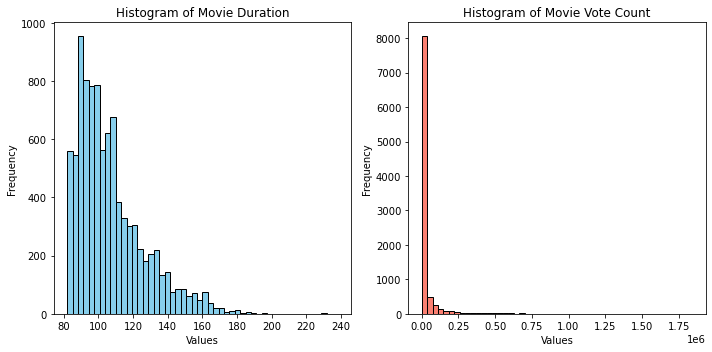

In [468]:
#filter by  number of votes
q85_votes = imdb_unique['numvotes'].quantile(0.85);
q25_runtime = imdb_unique['runtime_minutes'].quantile(0.25);
imdb_unique = imdb_unique[(imdb_unique['runtime_minutes'] > q25_runtime) & \
                          (imdb_unique['numvotes'] > q85_votes)]

fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # Adjust figsize as needed

# Plot the first histogram
axes[0].hist(imdb_unique['runtime_minutes'], bins=50, color='skyblue', edgecolor='black')
axes[0].set_xlabel('Values')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of Movie Duration')

# Plot the second histogram
axes[1].hist(imdb_unique['numvotes'], bins=50, color='salmon', edgecolor='black')
axes[1].set_xlabel('Values')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Histogram of Movie Vote Count')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [504]:
imdb_unique = imdb_unique[imdb_unique['start_year']>=2000]
cols_of_interest = ['primary_title', 'start_year', 'averagerating', 'numvotes', 'runtime_minutes', 'genres']
imdb_clean = imdb_unique[cols_of_interest].dropna().copy()

imdb_clean.rename(columns={'primary_title': 'title', 'start_year':'year', \
                           'averagerating':'avg_rating', 'numvotes':'total_votes', 
                          'runtime_minutes':'duration_min'}, \
                  inplace=True)
imdb_clean.describe()

,year,avg_rating,total_votes,duration_min
count,65210.000000,65210.000000,6.521000e+04,65210.000000
mean,2014.257200,6.320517,3.984502e+03,94.766263
std,2.601071,1.459269,3.221168e+04,210.185627
min,2010.000000,1.000000,5.000000e+00,3.000000
25%,2012.000000,5.500000,1.600000e+01,81.000000
50%,2014.000000,6.500000,6.300000e+01,91.000000
75%,2016.000000,7.300000,3.560000e+02,104.000000
max,2019.000000,10.000000,1.841066e+06,51420.000000


In [512]:
# additional cleanup by genres
set(imdb_clean.genres)


{'Action',
 'Action,Adult,Comedy',
 'Action,Adventure',
 'Action,Adventure,Animation',
 'Action,Adventure,Biography',
 'Action,Adventure,Comedy',
 'Action,Adventure,Crime',
 'Action,Adventure,Documentary',
 'Action,Adventure,Drama',
 'Action,Adventure,Family',
 'Action,Adventure,Fantasy',
 'Action,Adventure,History',
 'Action,Adventure,Horror',
 'Action,Adventure,Music',
 'Action,Adventure,Musical',
 'Action,Adventure,Mystery',
 'Action,Adventure,Romance',
 'Action,Adventure,Sci-Fi',
 'Action,Adventure,Sport',
 'Action,Adventure,Thriller',
 'Action,Adventure,War',
 'Action,Adventure,Western',
 'Action,Animation',
 'Action,Animation,Biography',
 'Action,Animation,Comedy',
 'Action,Animation,Crime',
 'Action,Animation,Documentary',
 'Action,Animation,Drama',
 'Action,Animation,Family',
 'Action,Animation,Fantasy',
 'Action,Animation,History',
 'Action,Animation,Horror',
 'Action,Animation,Music',
 'Action,Animation,Sci-Fi',
 'Action,Animation,Sport',
 'Action,Biography',
 'Action,Biograp

### 3.3.3. Cleaning Movie Budget Dataframe.
We'll add `year` column to filter out everything before 2000. Then we'll add `net_profit` and `roi` as the raw profit and the return on investment percentage of budget.  

In [505]:
# df info
movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,gross_usd_mil,budget_usd_mil,net_profit_usd_mil,roi_pct
0,1,2009-12-18,Avatar,"$425,000,000","$760,507,625","$2,776,345,279",2009,2776.345279,425.0,2351.345279,553.257713
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011,1045.663875,410.6,635.063875,154.667286
2,3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019,149.762350,350.0,-200.237650,-57.210757
3,4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015,1403.013963,330.6,1072.413963,324.384139
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",2017,1316.721747,317.0,999.721747,315.369636


In [471]:
# add year column
movie_budgets_df['release_date'] = pd.to_datetime(movie_budgets_df['release_date'])
movie_budgets_df['year'] = movie_budgets_df['release_date'].dt.year

# function will strip $ and , then convert to numeric
def profits_str2num(profit_col):
    cleaned_str = profit_col.str.replace("$", "").str.replace(",", "")
    cleaned_num = pd.to_numeric(cleaned_str, errors='coerce')
    return cleaned_num
    

# add 'net_profit' and 'roi' columns
gross_numeric = profits_str2num(movie_budgets_df.worldwide_gross)
budget_numeric = profits_str2num(movie_budgets_df.production_budget)

movie_budgets_df['gross_usd_mil'] = gross_numeric/1e+06
movie_budgets_df['budget_usd_mil'] = budget_numeric/1e+06

movie_budgets_df['net_profit_usd_mil'] = (gross_numeric - budget_numeric)/1e+06
movie_budgets_df['roi_pct'] = 100*(gross_numeric - budget_numeric)/budget_numeric

# look at the budget
print(movie_budgets_df['budget_usd_mil'].quantile([0.1, 0.5, 0.75]))

0.10     1.1
0.50    17.0
0.75    40.0
Name: budget_usd_mil, dtype: float64


We'll set the minimum budget to be `$500.000` and the minimum gross at `$0`. 

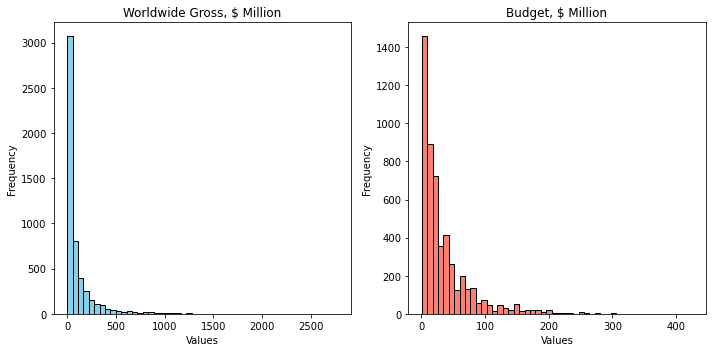

In [472]:
min_budget_mil = 0.5;
min_gross_mil = 0;
movie_budgets_df = movie_budgets_df[(movie_budgets_df['budget_usd_mil'] > min_budget_mil) & \
                          (movie_budgets_df['gross_usd_mil'] > min_gross_mil)]

fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # Adjust figsize as needed

# Plot the first histogram
axes[0].hist(movie_budgets_df['gross_usd_mil'], bins=50, color='skyblue', edgecolor='black')
axes[0].set_xlabel('Values')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Worldwide Gross, $ Million')

# Plot the second histogram
axes[1].hist(movie_budgets_df['budget_usd_mil'], bins=50, color='salmon', edgecolor='black')
axes[1].set_xlabel('Values')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Budget, $ Million')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [474]:
movie_budgets_df_y2k = movie_budgets_df[movie_budgets_df['year']>=2000]

# select subset of columns then remove nans

cols_of_interest = ['movie', 'year', 'net_profit_usd_mil', 'budget_usd_mil', 'gross_usd_mil', 'roi_pct']
movie_budgets_df_clean = movie_budgets_df_y2k[cols_of_interest].dropna().copy()

movie_budgets_df_clean.rename(columns={'movie':'title'}, inplace=True)
movie_budgets_df_clean.head()

,title,year,net_profit_usd_mil,budget_usd_mil,gross_usd_mil,roi_pct
0,Avatar,2009,2351.345279,425.0,2776.345279,553.257713
1,Pirates of the Caribbean: On Stranger Tides,2011,635.063875,410.6,1045.663875,154.667286
2,Dark Phoenix,2019,-200.237650,350.0,149.762350,-57.210757
3,Avengers: Age of Ultron,2015,1072.413963,330.6,1403.013963,324.384139
4,Star Wars Ep. VIII: The Last Jedi,2017,999.721747,317.0,1316.721747,315.369636


## 4. Combining IMDB and Budget Dataframes.

Let's see how much movie title cleaning we might need to do before merging.  

In [476]:
# how many movie titles from budget df are NOT present in IMDB df
movie_budgets_df_clean[~movie_budgets_df_clean['title'].isin(imdb_clean.title)]

,title,year,net_profit_usd_mil,budget_usd_mil,gross_usd_mil,roi_pct
0,Avatar,2009,2351.345279,425.00,2776.345279,553.257713
4,Star Wars Ep. VIII: The Last Jedi,2017,999.721747,317.00,1316.721747,315.369636
5,Star Wars Ep. VII: The Force Awakens,2015,1747.311220,306.00,2053.311220,571.016739
7,Pirates of the Caribbean: At Worldâs End,2007,663.420425,300.00,963.420425,221.140142
15,Spider-Man 3,2007,636.860230,258.00,894.860230,246.845050
...,...,...,...,...,...,...
5414,Drunk Wedding,2015,-0.596699,0.60,0.003301,-99.449833
5415,They Will Have to Kill Us First,2016,-0.592057,0.60,0.007943,-98.676167
5421,The Harvest/La Cosecha,2011,-0.556291,0.56,0.003709,-99.337679
5422,Julija in alfa Romeo,2015,-0.551538,0.56,0.008462,-98.488929


In [497]:
# Uh-oh, some heavy-hitters didn't make it. Can't believe Avatar didn't make it!
movie_basics[movie_basics.primary_title.str.contains('Avatar')]

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
1795,tt10168040,My Avatar Horse,My Avatar Horse,2012,NaN,Drama
4315,tt10403262,Xbox Avatar Fun,Xbox Avatar Fun,2019,NaN,Action
11392,tt1630029,Avatar 2,Avatar 2,2021,NaN,"Action,Adventure,Fantasy"
16337,tt1757678,Avatar 3,Avatar 3,2023,NaN,"Action,Adventure,Drama"
17060,tt1775309,Avatar,Abatâ,2011,93.0,Horror
20368,tt1854506,Aliens vs. Avatars,Aliens vs. Avatars,2011,80.0,"Horror,Sci-Fi"
34245,tt2271191,Avatars as Prostitutes,Avatars as Prostitutes,2012,51.0,"Animation,Documentary,Drama"
52213,tt3095356,Avatar 4,Avatar 4,2025,NaN,"Action,Adventure,Fantasy"
68178,tt3879186,Avatarii: Birth of a Fandom,Avatarii: Birth of a Fandom,2014,NaN,Documentary
77990,tt4472992,Avatarachi Goshta,Avatarachi Goshta,2014,118.0,Drama


In [508]:
# how franchise movies are displayed in the imdb df
test_strings = ['Avengers', 'Harry Potter', 'Star Wars', 'Fast and Furious', 'James Bond']

[imdb_clean[imdb_clean['title'].str.contains(x)] for x in test_strings]

[                                 title  year  avg_rating  total_votes  \
 325                       The Avengers  2012         8.1      1183655   
 43419           Avengers: Infinity War  2018         8.5       670926   
 24058          Avengers: Age of Ultron  2015         7.3       665594   
 43420                Avengers: Endgame  2019         8.8       441135   
 59792  Avengers of Justice: Farce Wars  2018         2.4          190   
 
        duration_min                   genres  
 325           143.0  Action,Adventure,Sci-Fi  
 43419         149.0  Action,Adventure,Sci-Fi  
 24058         141.0  Action,Adventure,Sci-Fi  
 43420         181.0  Action,Adventure,Sci-Fi  
 59792          87.0     Action,Comedy,Family  ,
                                                    title  year  avg_rating  \
 1291        Harry Potter and the Deathly Hallows: Part 2  2011         8.1   
 420         Harry Potter and the Deathly Hallows: Part 1  2010         7.7   
 68483                   Har

In [503]:
# how franchise movies are displayed in the movie budgets df
[movie_budgets_df_clean[movie_budgets_df_clean['title'].str.contains(x)] for x in test_strings]

[                      title  year  net_profit_usd_mil  budget_usd_mil  \
 3   Avengers: Age of Ultron  2015         1072.413963           330.6   
 6    Avengers: Infinity War  2018         1748.134200           300.0   
 26             The Avengers  2012         1292.935897           225.0   
 
     gross_usd_mil     roi_pct  
 3     1403.013963  324.384139  
 6     2048.134200  582.711400  
 26    1517.935897  574.638176  ,
                                              title  year  net_profit_usd_mil  \
 19          Harry Potter and the Half-Blood Prince  2009          685.213767   
 157      Harry Potter and the Order of the Phoenix  2007          793.076457   
 158            Harry Potter and the Goblet of Fire  2005          747.099794   
 238       Harry Potter and the Prisoner of Azkaban  2004          666.907323   
 260  Harry Potter and the Deathly Hallows: Part II  2011         1216.693157   
 262        Harry Potter and the Sorcererâs Stone  2001          850.047606   
 2

{'Action',
 'Action,Adult,Comedy',
 'Action,Adventure',
 'Action,Adventure,Animation',
 'Action,Adventure,Biography',
 'Action,Adventure,Comedy',
 'Action,Adventure,Crime',
 'Action,Adventure,Documentary',
 'Action,Adventure,Drama',
 'Action,Adventure,Family',
 'Action,Adventure,Fantasy',
 'Action,Adventure,History',
 'Action,Adventure,Horror',
 'Action,Adventure,Music',
 'Action,Adventure,Musical',
 'Action,Adventure,Mystery',
 'Action,Adventure,Romance',
 'Action,Adventure,Sci-Fi',
 'Action,Adventure,Sport',
 'Action,Adventure,Thriller',
 'Action,Adventure,War',
 'Action,Adventure,Western',
 'Action,Animation',
 'Action,Animation,Biography',
 'Action,Animation,Comedy',
 'Action,Animation,Crime',
 'Action,Animation,Documentary',
 'Action,Animation,Drama',
 'Action,Animation,Family',
 'Action,Animation,Fantasy',
 'Action,Animation,History',
 'Action,Animation,Horror',
 'Action,Animation,Music',
 'Action,Animation,Sci-Fi',
 'Action,Animation,Sport',
 'Action,Biography',
 'Action,Biograp